# Fraud Detection Analysis

### Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

### Loading and Copying the Dataset

In [5]:
data = pd.read_csv('Fraud_Analysis_Dataset.csv')

In [6]:
# Create a copy of the dataset for processing
df = data.copy()

### Inspecting the Dataset

In [8]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [9]:
data.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,11142,1.114200e+04,11142,1.114200e+04,1.114200e+04,11142,1.114200e+04,1.114200e+04,11142.000000
unique,NaN,5,NaN,11142,NaN,NaN,7508,NaN,NaN,NaN
top,NaN,PAYMENT,NaN,C1305486145,NaN,NaN,C985934102,NaN,NaN,NaN
freq,NaN,5510,NaN,1,NaN,NaN,62,NaN,NaN,NaN
mean,8.717645,NaN,2.131915e+05,NaN,9.241173e+05,8.249576e+05,NaN,8.883541e+05,1.103211e+06,0.102495
std,16.067479,NaN,7.600650e+05,NaN,2.143004e+06,2.089894e+06,NaN,2.601376e+06,2.982447e+06,0.303312
min,1.000000,NaN,2.390000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,NaN,4.946618e+03,NaN,4.270000e+02,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,NaN,1.676126e+04,NaN,2.816950e+04,4.420605e+03,NaN,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,NaN,1.543366e+05,NaN,3.040855e+05,1.114126e+05,NaN,2.711555e+05,3.186374e+05,0.000000


## Dataset Overview
The dataset contains **11,142 rows** and **10 columns**. Below is a summary of its structure and key insights:

### Column Details
1. **`step`**: Indicates time steps in the simulation. Integer values ranging from **1** to **95**.
2. **`type`**: Transaction type (e.g., `TRANSFER`, `CASH_OUT`, `PAYMENT`). There are **5 unique categories**.
3. **`amount`**: The transaction amount. Values range from **2.39** to **10,000,000**.
4. **`nameOrig`**: The customer initiating the transaction. Each row has a unique identifier for the customer.
5. **`oldbalanceOrg`**: Original balance of the customer before the transaction.
6. **`newbalanceOrig`**: Customer balance after the transaction.
7. **`nameDest`**: Destination account for the transaction. There are **7,508 unique values**.
8. **`oldbalanceDest`**: Balance of the destination account before the transaction.
9. **`newbalanceDest`**: Balance of the destination account after the transaction.
10. **`isFraud`**: Indicates whether the transaction is fraudulent:
   - `1` = Fraudulent Transaction
   - `0` = Non-Fraudulent Transaction.

In [11]:
# Checking for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [12]:
# Unique values in the target column
df['isFraud'].unique()

array([1, 0], dtype=int64)

### Distribution of Fraudulent vs Non-Fraudulent Transactions

In [14]:
fraud_counts = data['isFraud'].value_counts(normalize=True)

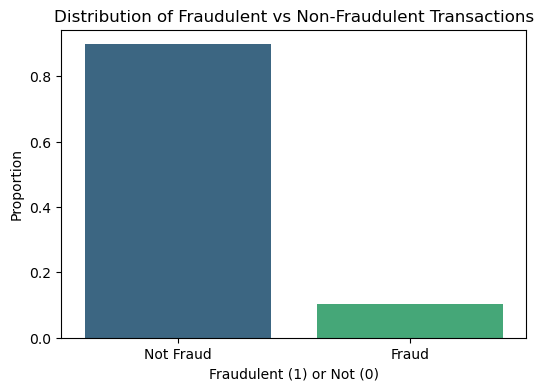

In [15]:
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')
plt.title("Distribution of Fraudulent vs Non-Fraudulent Transactions")
plt.xlabel("Fraudulent (1) or Not (0)")
plt.ylabel("Proportion")
plt.xticks([0, 1], labels=["Not Fraud", "Fraud"])
plt.show
plt.savefig('first.png', dpi=300, bbox_inches='tight')

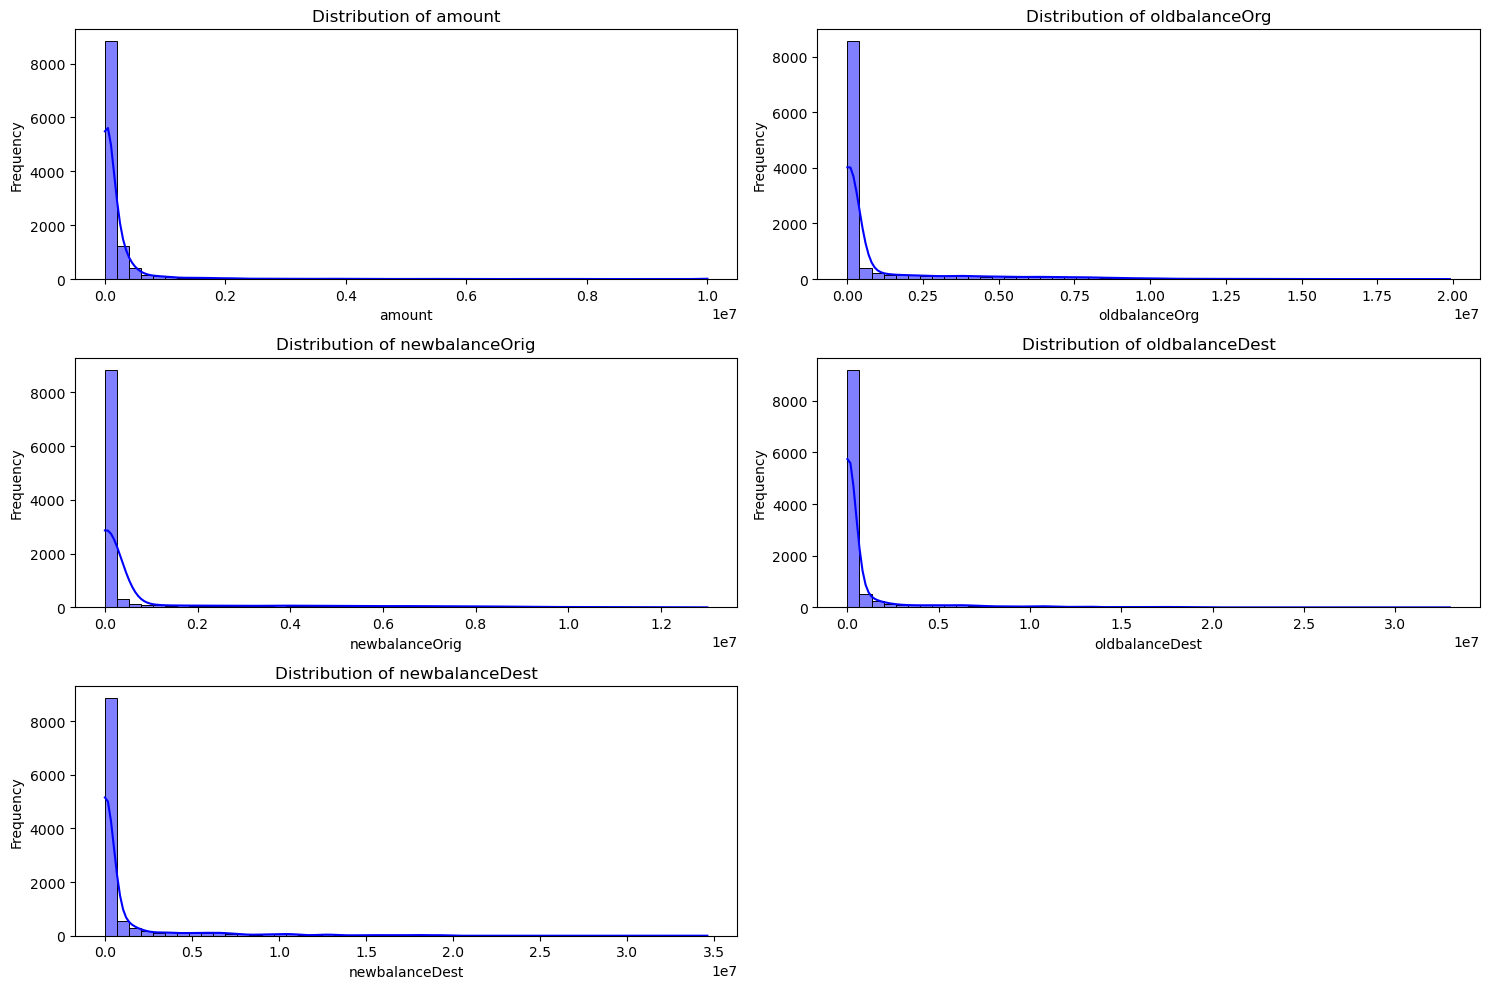

In [16]:
# Plot distribution of numerical columns
num_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], bins=50, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('2.png', dpi=300, bbox_inches='tight')
plt.show()


## Key Insights from Visualizations

1. **Class Distribution (`isFraud`)**:
   - Fraudulent transactions are much fewer compared to non-fraudulent ones, showing a clear **class imbalance**.

2. **Distributions of Numerical Columns**:
   - The **`amount`** column is highly skewed, with most transactions involving smaller amounts.
   - **`oldbalanceOrg` and `newbalanceOrg`**:
     - A lot of accounts have zero balance before and after the transaction.
   - **`oldbalanceDest` and `newbalanceDest`**:
     - A similar trend to the origin accounts, where most destination accounts have low balances.


### Distribution of Transaction Types

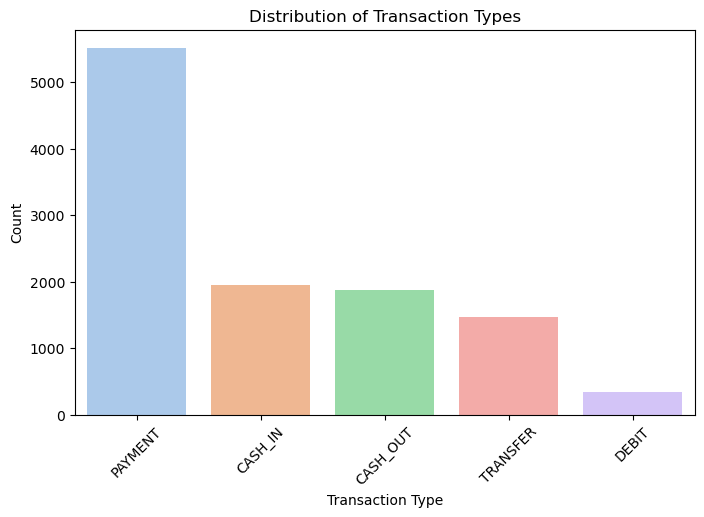

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='type', palette='pastel', order=data['type'].value_counts().index)
plt.title("Distribution of Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
plt.savefig('3.png', dpi=300, bbox_inches='tight')

### Transaction Amounts by Type and Fraud Status

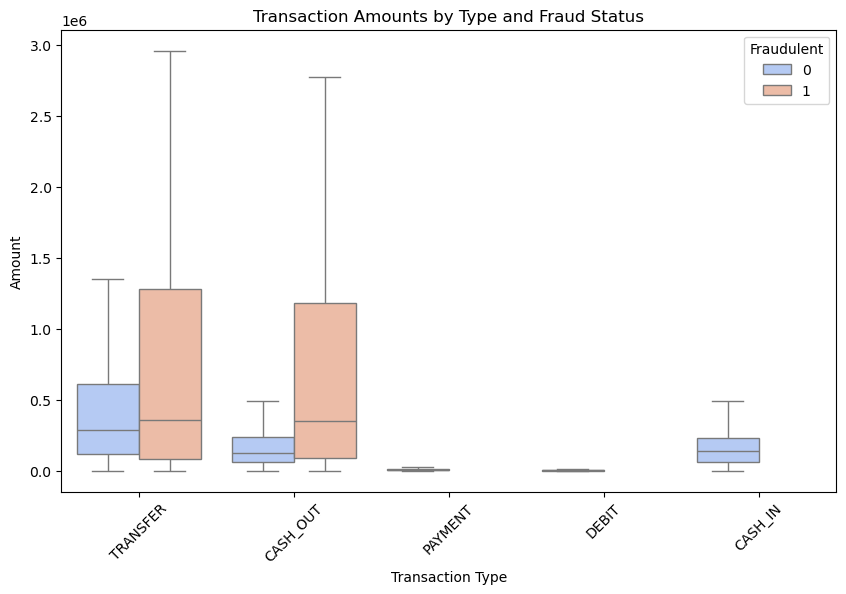

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='type', y='amount', hue='isFraud', showfliers=False, palette='coolwarm')
plt.title("Transaction Amounts by Type and Fraud Status")
plt.xlabel("Transaction Type")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend(title="Fraudulent", loc='upper right')
plt.show()
plt.savefig('4.png', dpi=300, bbox_inches='tight')

 **Fraud by Transaction Type**:
   - Fraud is concentrated in `TRANSFER` and `CASH_OUT` transactions.
   - Other transaction types (e.g., `PAYMENT`, `DEBIT`) show negligible fraud occurrences.


### Count Plot of Transaction Types

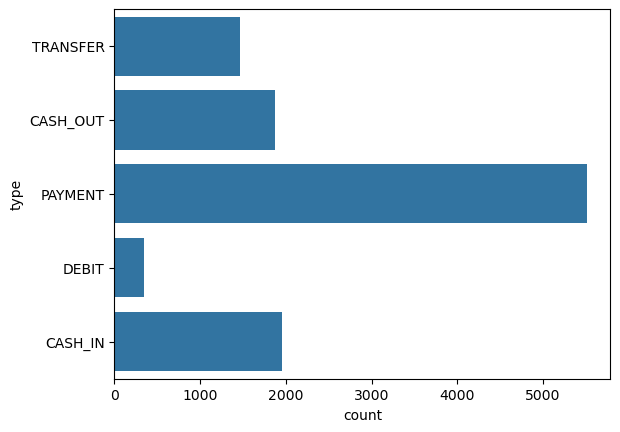

<Figure size 640x480 with 0 Axes>

In [24]:
sns.countplot(df['type'])
plt.show()
plt.savefig('5.png', dpi=300, bbox_inches='tight')

### Dropping Irrelevant Columns

In [26]:
df1 = df.drop(columns=['nameOrig', 'nameDest'])

### Encoding Categorical Variables

### One-Hot Encoding the 'type' Column
I'm using the `pd.get_dummies()` function to convert the categorical column `'type'` into numerical columns through one-hot encoding.

- **One-Hot Encoding**: This method creates new binary columns for each unique category in the `'type'` column. A `1` represents the presence of a category, while a `0` indicates its absence.
- **`drop_first=True`**: This avoids the "dummy variable trap" by removing the first category column, preventing perfect multicollinearity.
- **Result**: The dataset will now have new binary columns for each category in `'type'`, replacing the original column.
st=True)


In [29]:
# Convert 'type' column to numerical using one-hot encoding
df2 = pd.get_dummies(df1, columns=['type'], drop_first=True)

### Correlation Heatmap

In [31]:
# Compute the correlation matrix
correlation_matrix = df2.corr()

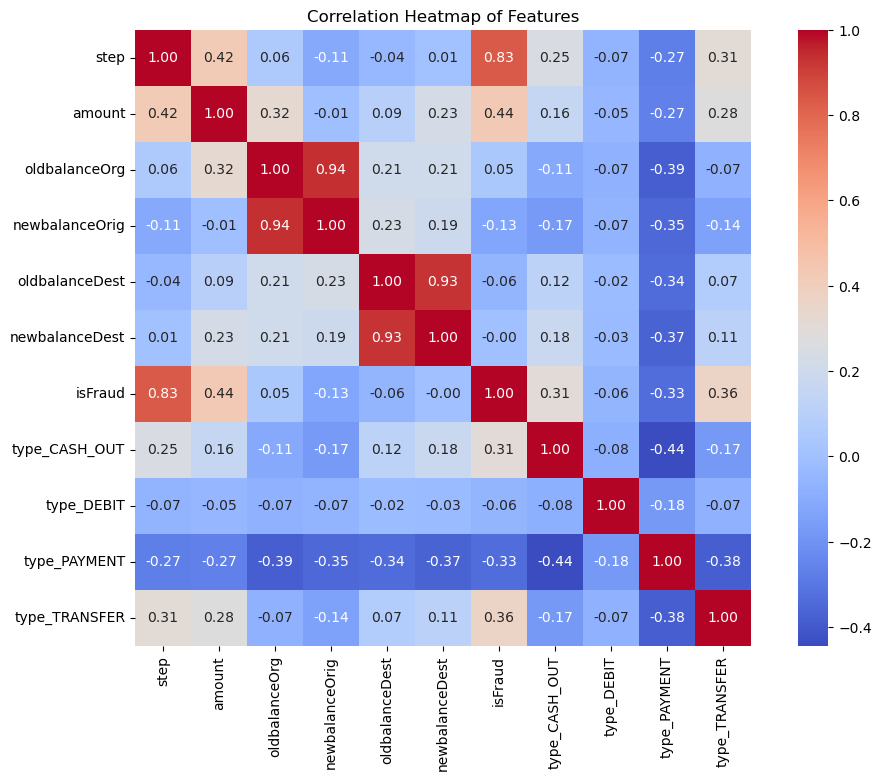

<Figure size 640x480 with 0 Axes>

In [32]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()
plt.savefig('6.png', dpi=300, bbox_inches='tight')

## Correlation Heatmap:

- I observed strong correlations between:
    - `oldbalanceOrg` and `newbalanceOrig`: Customers with higher initial balances tend to retain a similar proportion of their balance after the transaction.
    - `oldbalanceDest` and `newbalanceDest`: A similar trend is seen for destination accounts.
  
- The `isFraud` feature shows weak correlations with most numerical features, which suggests that detecting fraud might need more advanced modeling techniques or feature engineering to capture complex patterns.


### Correcting Target Variable Format

In [35]:
df2['isFraud'] = df2['isFraud'].replace('False', 0)
df2['isFraud'] = df2['isFraud'].replace('True', 1)

### Correlation with Target Variable

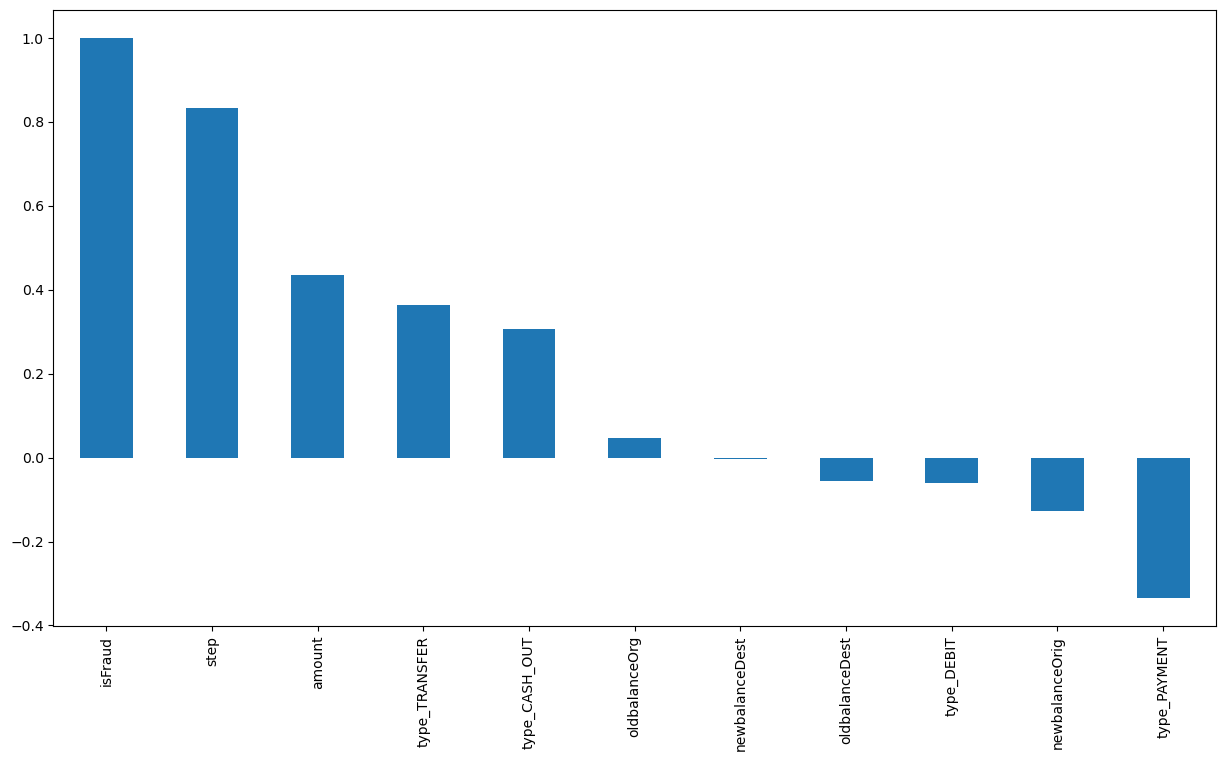

<Figure size 640x480 with 0 Axes>

In [37]:
# Correlation with 'isFraud'
df2.corr()['isFraud'].sort_values(ascending=False)

# Bar plot of correlations
plt.figure(figsize=(15, 8))
df2.corr()['isFraud'].sort_values(ascending=False).plot(kind='bar')
plt.show()
plt.savefig('7.png', dpi=300, bbox_inches='tight')

### Dropping Low Importance Features

In [39]:
df3 = df2.copy()
df3 = df3.drop(columns=['oldbalanceOrg', 'newbalanceOrig'])

### Analyzing Fraud Patterns by Transaction Type
In this analysis, we focus on identifying the distribution of fraudulent transactions based on their types (e.g., `TRANSFER` and `CASH_OUT`). 

Steps:
1. **Filter Fraudulent Transactions**: Select rows where `isFraud` is `1` to isolate fraudulent activities.
2. **Count Transactions by Type**: Use `value_counts()` to calculate the count of fraudulent transactions for each type.
3. **Visualization**: Plot the counts using a barplot to understand which transaction types are more prone to fraud.

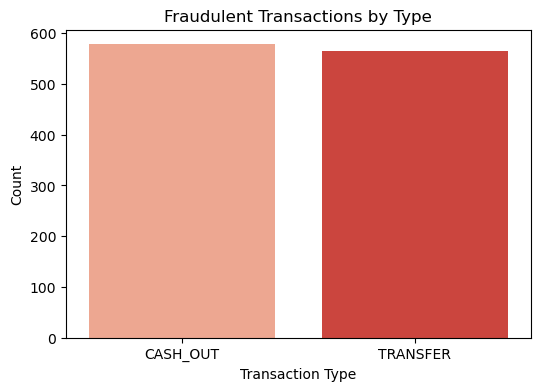

In [41]:
# Analyze fraud patterns for specific transaction types (TRANSFER and CASH_OUT)
fraud_by_type = data[data['isFraud'] == 1]['type'].value_counts()

# Plot fraudulent transaction counts by type
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values, palette='Reds')
plt.title('Fraudulent Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

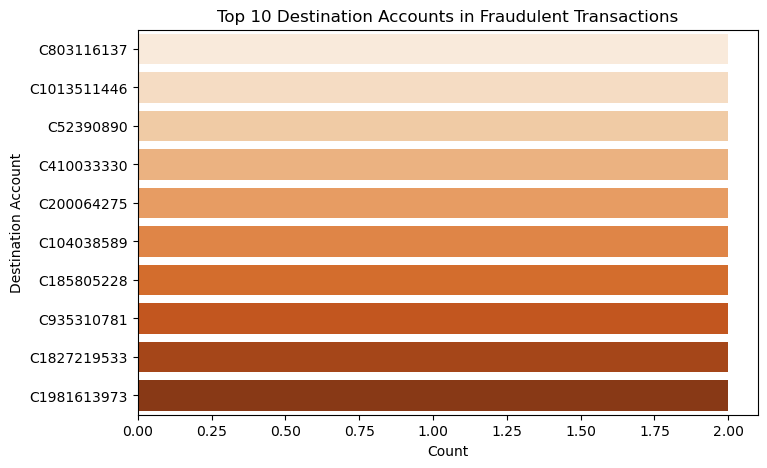

In [42]:
# Analyze destination accounts (nameDest) for fraud
fraud_dest_counts = data[data['isFraud'] == 1]['nameDest'].value_counts().head(10)

# Plot top destination accounts involved in fraud
plt.figure(figsize=(8, 5))
sns.barplot(y=fraud_dest_counts.index, x=fraud_dest_counts.values, palette='Oranges')
plt.title('Top 10 Destination Accounts in Fraudulent Transactions')
plt.xlabel('Count')
plt.ylabel('Destination Account')
plt.show()

## Preparing Data for Modeling

In [44]:
df3

,step,amount,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,181.00,0.00,0.00,1,False,False,False,True
1,1,181.00,21182.00,0.00,1,True,False,False,False
2,1,2806.00,0.00,0.00,1,False,False,False,True
3,1,2806.00,26202.00,0.00,1,True,False,False,False
4,1,20128.00,0.00,0.00,1,False,False,False,True
...,...,...,...,...,...,...,...,...,...
11137,7,6393.71,478421.00,210535.25,0,False,True,False,False
11138,7,298799.54,704355.36,5270364.19,0,True,False,False,False
11139,7,423159.63,610479.00,749621.53,0,True,False,False,False
11140,7,1094.03,0.00,0.00,0,False,False,True,False


### Outlier Detection and Analysis Using Z-Score
In this section, I'm identifying and analyzing outliers in the dataset using the Z-score method. The Z-score helps determine how far a data point is from the mean of the dataset. Any value above a certain threshold (usually 3) is considered an outlier.

Steps:
1. **Z-Score Calculation**: 
   - I calculate the Z-scores for selected numerical columns (`'step'`, `'amount'`, `'oldbalanceDest'`, and `'newbalanceDest'`).
   - A Z-score above 3 or below -3 means the data point is an outlier.
   
2. **Flagging Outliers**: 
   - I create a new column, `'is_outlier'`, which flags rows where any of the selected columns have a Z-score greater than 3.

3. **Separating Outliers**: 
   - I extract outliers into a new DataFrame (`outliers`), and the non-outliers are stored separately.

4. **Outlier Summary**: 
   - I use `describe()` to get summary statistics for the outliers to gain insights into their characteristics.

5. **Visualization**: 
   - I use a **boxplot** to visualize the distribution of values in the outlier columns.
   - I also create a **scatterplot** to see the relationship between `'amount'` and `'oldbalanceDest'` for the outliers.


Outlier summary statistics:
             step        amount  oldbalanceDest  newbalanceDest     isFraud  \
count  972.000000  9.720000e+02    9.720000e+02    9.720000e+02  972.000000   
mean    41.880658  1.328881e+06    5.196726e+06    6.475598e+06    0.586420   
std     34.910363  2.164711e+06    6.261030e+06    6.682285e+06    0.492729   
min      1.000000  2.158300e+02    0.000000e+00    0.000000e+00    0.000000   
25%      6.000000  1.418286e+05    0.000000e+00    0.000000e+00    0.000000   
50%     56.500000  3.561868e+05    4.840473e+05    3.575399e+06    1.000000   
75%     74.000000  1.470935e+06    1.060000e+07    1.240000e+07    1.000000   
max     95.000000  1.000000e+07    3.300000e+07    3.460000e+07    1.000000   

       is_outlier  
count       972.0  
mean          1.0  
std           0.0  
min           1.0  
25%           1.0  
50%           1.0  
75%           1.0  
max           1.0  


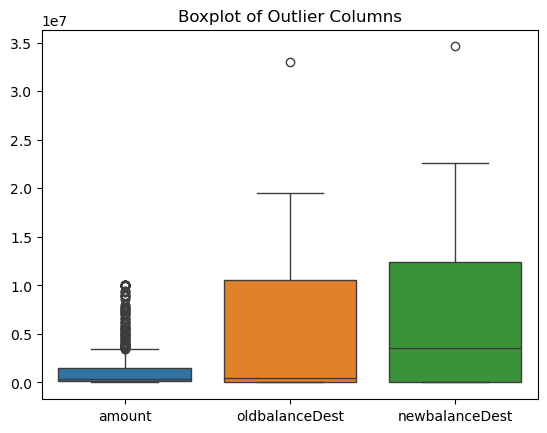

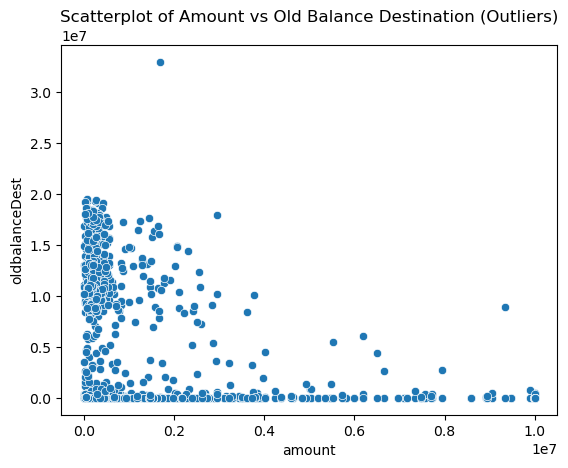

In [46]:
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate Z-scores and flag outliers
selected_columns = ['step', 'amount', 'oldbalanceDest', 'newbalanceDest']
z_scores = df3[selected_columns].apply(zscore)
df3['is_outlier'] = (abs(z_scores) > 3).any(axis=1).astype(int)

# Step 2: Separate outliers
outliers = df3[df3['is_outlier'] == 1]
non_outliers = df3[df3['is_outlier'] == 0]

# Step 3: Analyze outliers
print("Outlier summary statistics:")
print(outliers.describe())

# Visualize outliers
sns.boxplot(data=outliers[['amount', 'oldbalanceDest', 'newbalanceDest']])
plt.title("Boxplot of Outlier Columns")
plt.show()

sns.scatterplot(data=outliers, x='amount', y='oldbalanceDest')
plt.title("Scatterplot of Amount vs Old Balance Destination (Outliers)")
plt.show()


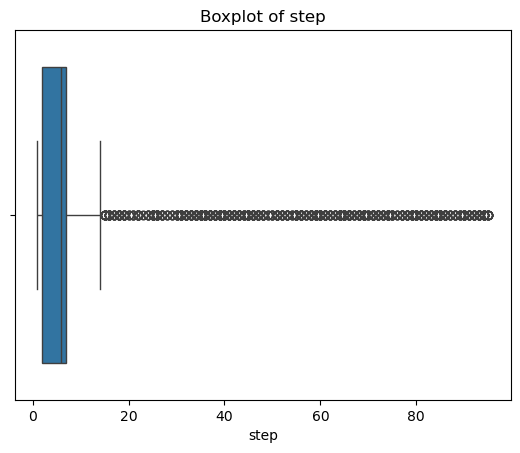

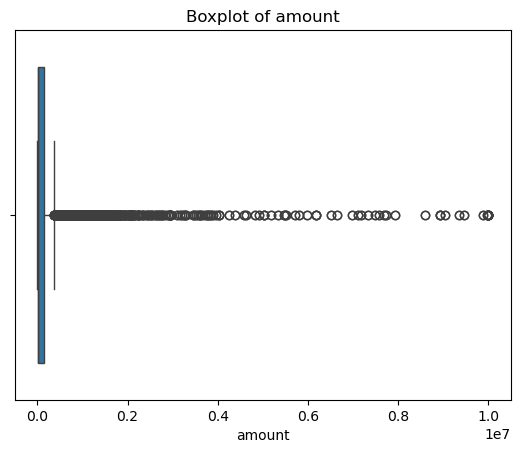

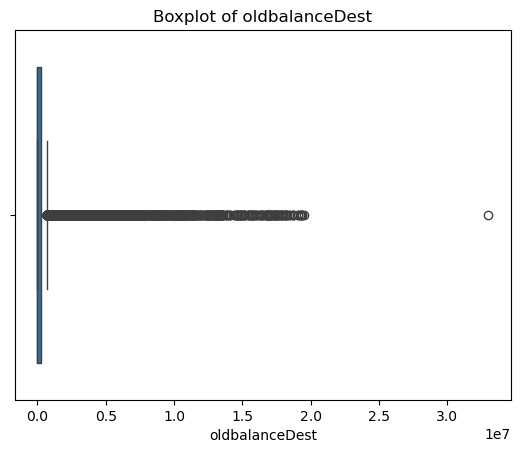

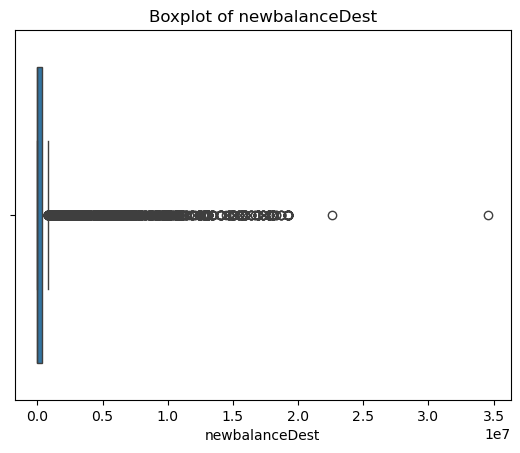

In [47]:
for column in ['step', 'amount', 'oldbalanceDest', 'newbalanceDest']:
    sns.boxplot(data=df3, x=column)
    plt.title(f"Boxplot of {column}")
    plt.show()


In [48]:
df3 #Viewing the updated dataset with is_outlier column

,step,amount,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,is_outlier
0,1,181.00,0.00,0.00,1,False,False,False,True,0
1,1,181.00,21182.00,0.00,1,True,False,False,False,0
2,1,2806.00,0.00,0.00,1,False,False,False,True,0
3,1,2806.00,26202.00,0.00,1,True,False,False,False,0
4,1,20128.00,0.00,0.00,1,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...
11137,7,6393.71,478421.00,210535.25,0,False,True,False,False,0
11138,7,298799.54,704355.36,5270364.19,0,True,False,False,False,0
11139,7,423159.63,610479.00,749621.53,0,True,False,False,False,0
11140,7,1094.03,0.00,0.00,0,False,False,True,False,0


## Splitting Data into Features (X) and Target (y)
In this step, I separate the target variable (`isFraud`) from the feature columns.

- **Target Variable (`y`)**: I assign the `'isFraud'` column to `y`, which contains the labels for fraud detection (0 for non-fraud, 1 for fraud).
- **Feature Variables (`X`)**: I remove the `'isFraud'` column from the dataset to create `X`, which contains the input features used for model training.

### Scaling Features to a Range of 0 to 1
Since the features have different scales, I scale them to a uniform range of 0 to 1 using `MinMaxScaler` to help improve the performance of machine learning models.

- **MinMaxScaler**: This scaler transforms all the features to be within the range of 0 and 1.
- **Fitting and Transforming**: I first fit the scaler to the data and then transform the feature variables (`X`) to scale them.

In [50]:
# Splitting data into features (X) and target (y)
y = df3['isFraud'].values
x = df3.drop(columns=['isFraud'])

# Scaling all variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler

features = x.columns.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.columns = features

## Handling Class Imbalance Using SMOTE
To address the class imbalance in the dataset, I'm using **SMOTE (Synthetic Minority Over-sampling Technique)** to oversample the minority class (fraudulent transactions).

- **SMOTE**: It generates synthetic samples for the minority class by interpolating between existing minority class instances. This helps balance the distribution of the target variable and improves model performance.
- **Resampling**: After applying SMOTE, I obtain resampled feature variables (`X_resampled`) and target labels (`y_resampled`), where both classes (fraud and non-fraud) are now balanced.


In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

## Splitting Data into Train and Test Sets

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [55]:

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import ipywidgets as widgets
from IPython.display import display, HTML


import warnings
warnings.filterwarnings('ignore')

### Hyperparameter Tuning Function for Classifier
The function `tune_clf_hyperparameters` is designed to optimize the hyperparameters of a classifier using **GridSearchCV** and **cross-validation**. It helps find the best combination of hyperparameters based on a given evaluation metric (default is `recall`).

#### Steps:
1. **Cross-Validation Setup**:
   - Uses **StratifiedKFold** to ensure the class distribution is the same across all folds of cross-validation.
   - The number of splits is controlled by `n_splits`, and the data is shuffled before splitting.

2. **GridSearchCV**:
   - **GridSearchCV** evaluates different hyperparameter combinations provided in the `param_grid` and finds the best model based on the given `scoring` metric (default is `recall`).

3. **Fit Model**:
   - The classifier (`clf`) is trained on the training data (`X_train`, `y_train`) using the specified hyperparameter grid.

4. **Return Best Model**:
   - The function returns the classifier with the best hyperparameters (`best_estimator_`) and the best hyperparameters (`best_params_`).


In [57]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

### Model Evaluation Function
The `evaluate_model` function is used to evaluate the performance of a trained model on the test data using several classification metrics. These metrics help assess how well the model is performing for each class as well as overall.

#### Steps:
1. **Predictions**:
   - The model makes predictions on the test data (`X_test`) using the `predict()` method.

2. **Classification Report**:
   - A detailed classification report is generated using `classification_report()`, which includes precision, recall, and F1-score for each class (0 and 1).

3. **Extracting Metrics**:
   - The function extracts key performance metrics from the classification report:
     - **Precision**: The proportion of true positive predictions out of all positive predictions.
     - **Recall**: The proportion of true positive predictions out of all actual positives.
     - **F1-score**: The harmonic mean of precision and recall.
     - **Macro Average**: The average of precision, recall, and F1-score across all classes.
     - **Accuracy**: The overall accuracy of the model.

4. **Return Metrics**:
   - The metrics are stored in a dictionary and converted to a pandas DataFrame for easy viewing and comparison. The DataFrame is rounded to two decimal places.


In [59]:
def evaluate_model(model, X_test, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extracting metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }
    
    # Convert dictionary to dataframe
    df = pd.DataFrame(metrics, index=[model_name]).round(2)
    
    return df

# RandomForest

In [61]:
rf_base = RandomForestClassifier(random_state=0)

In [62]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

In [63]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [64]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6970
           1       1.00      0.97      0.99      7030

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



In [65]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3030
           1       1.00      0.97      0.99      2970

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



In [66]:
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.97,1.0,1.0,0.97,0.99,0.99,0.99,0.99,0.99,0.99


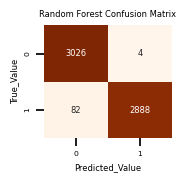

In [67]:
# Plotting the Confusion Matrix for Random Forest Algorithm
cm_rf = confusion_matrix(y_test,best_rf.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_rf,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Random Forest Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

# SVM

In [69]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=0)) 
])

In [70]:
param_grid_svm = {
    'svm__C': [5],
    'svm__kernel': ['linear', 'rbf', 'poly'],
}

In [71]:
# Call the function for hyperparameter tuning
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, X_train, y_train)
print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)

SVM Optimal Hyperparameters: 
 {'svm__C': 5, 'svm__kernel': 'rbf'}


In [72]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_svm.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      6970
           1       0.98      0.97      0.97      7030

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [73]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3030
           1       0.97      0.97      0.97      2970

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



In [74]:
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.97


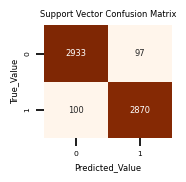

In [75]:
# Plotting the Confusion Matrix for Support Vector Classifier Algorithm
cm_svc = confusion_matrix(y_test, best_svm.predict(X_test))
plt.figure(figsize=(1.8,1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_svc,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Support Vector Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

# Logistic Regression

In [77]:
# Initialize the Logistic Regression classifier
lr_base = LogisticRegression(random_state=0)


Logistic Regression Optimal Hyperparameters: 
 {'C': 0.01, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       1.00      0.79      0.89      6970
           1       0.83      1.00      0.91      7030

    accuracy                           0.90     14000
   macro avg       0.92      0.90      0.90     14000
weighted avg       0.92      0.90      0.90     14000

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      3030
           1       0.83      1.00      0.91      2970

    accuracy                           0.90      6000
   macro avg       0.92      0.90      0.90      6000
weighted avg       0.92      0.90      0.90      6000

                     precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
Logistic Regression          1.0         0.83       0.8       1.0  0.89  0.91   

                     macro_avg_precision  macro_avg_recall  macro_av

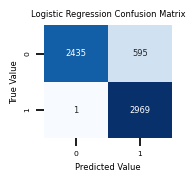

In [78]:
# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers
    'max_iter': [50, 100, 200],  # Number of iterations for convergence
    'penalty': ['l2'],  # L2 regularization
}

# Using the tune_clf_hyperparameters function to get the best estimator
best_lr, best_lr_hyperparams = tune_clf_hyperparameters(lr_base, param_grid_lr, X_train, y_train)
print('Logistic Regression Optimal Hyperparameters: \n', best_lr_hyperparams)

# Evaluate the optimized model on the train data
print(classification_report(y_train, best_lr.predict(X_train)))

# Evaluate the optimized model on the test data
print(classification_report(y_test, best_lr.predict(X_test)))

# Evaluate the Logistic Regression model
lr_evaluation = evaluate_model(best_lr, X_test, y_test, 'Logistic Regression')
print(lr_evaluation)

# Plotting the Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, best_lr.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook', font_scale=0.5)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.tight_layout()
plt.show()

# AdaBoostClassifier

In [80]:
from sklearn.ensemble import AdaBoostClassifier


AdaBoost Optimal Hyperparameters: 
 {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6970
           1       0.99      0.99      0.99      7030

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3030
           1       0.99      0.99      0.99      2970

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000

          precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
AdaBoost         0.99         0.99      0.99      0.99  0.99  0.99   

          macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
AdaBoost                 0.99  

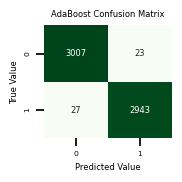

In [81]:
# Initialize the AdaBoost classifier
ada_base = AdaBoostClassifier(random_state=0)

# Define the parameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200],  # Number of estimators (weak learners)
    'learning_rate': [0.01, 0.1, 1, 10],  # Weight applied to each estimator
    'algorithm': ['SAMME', 'SAMME.R'],  # Algorithm to use for boosting
}

# Using the tune_clf_hyperparameters function to get the best estimator
best_ada, best_ada_hyperparams = tune_clf_hyperparameters(ada_base, param_grid_ada, X_train, y_train)
print('AdaBoost Optimal Hyperparameters: \n', best_ada_hyperparams)

# Evaluate the optimized model on the train data
print(classification_report(y_train, best_ada.predict(X_train)))

# Evaluate the optimized model on the test data
print(classification_report(y_test, best_ada.predict(X_test)))

# Evaluate the AdaBoost model
ada_evaluation = evaluate_model(best_ada, X_test, y_test, 'AdaBoost')
print(ada_evaluation)

# Plotting the Confusion Matrix for AdaBoost
cm_ada = confusion_matrix(y_test, best_ada.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook', font_scale=0.5)
sns.heatmap(cm_ada, annot=True, fmt='d', cmap="Greens", cbar=False)
plt.title('AdaBoost Confusion Matrix')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.tight_layout()
plt.show()

In [82]:
# Concatenate the dataframes
all_evaluations = [rf_evaluation, svm_evaluation,ada_evaluation,lr_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
Logistic Regression,1.00,0.83,0.80,1.00,0.89,0.91,0.92,0.90,0.90,0.90
AdaBoost,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99
RF,0.97,1.00,1.00,0.97,0.99,0.99,0.99,0.99,0.99,0.99
SVM,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.97


### Model Comparison and My Conclusion

After looking at all the model evaluation results, I think **AdaBoost** is the best model here:

- **Precision**: AdaBoost has a solid precision of 0.99 for both classes (0 and 1), meaning it's really good at avoiding false positives.
- **Recall**: The recall for class 1 (fraudulent transactions) is 0.99, which is awesome because it catches almost all the fraud cases. This is super important for fraud detection.
- **F1-Score**: AdaBoost's F1-score is also 0.99, which shows it's balancing precision and recall really well.
- **Accuracy**: AdaBoost has an accuracy of 0.99, which means it’s performing well overall across the whole dataset.

Even though **Logistic Regression** has perfect recall for class 1 (1.00), AdaBoost's precision is slightly better across the board, which gives it an edge. Plus, the F1-score is high, showing it's not sacrificing recall just for precision.

### My Final Take:
Based on all these metrics, I’d go with **AdaBoost**. It does the best job in both identifying fraud (high recall) and minimizing mistakes (high precision). So, it’s the most reliable model for this task.
ction task.


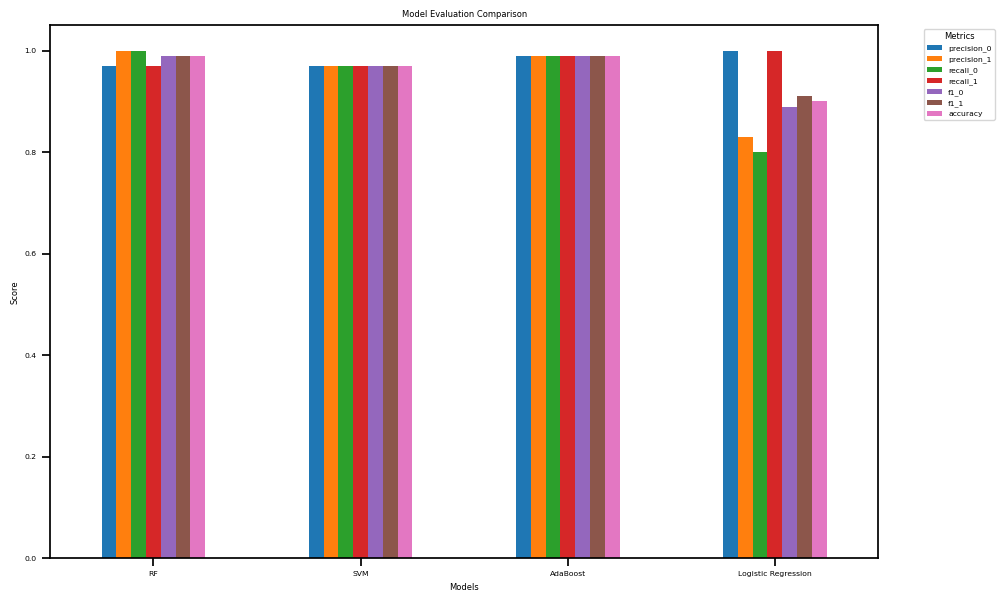

In [84]:
# Combine all the evaluation data into one DataFrame
evaluations = pd.concat([rf_evaluation, svm_evaluation, ada_evaluation, lr_evaluation])

# Plot the metrics
metrics_to_plot = ['precision_0', 'precision_1', 'recall_0', 'recall_1', 'f1_0', 'f1_1', 'accuracy']

# Plot each metric for all models
evaluations[metrics_to_plot].plot(kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Comparison')
plt.ylabel('Score')
plt.xlabel('Models')
plt.xticks(rotation=0)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


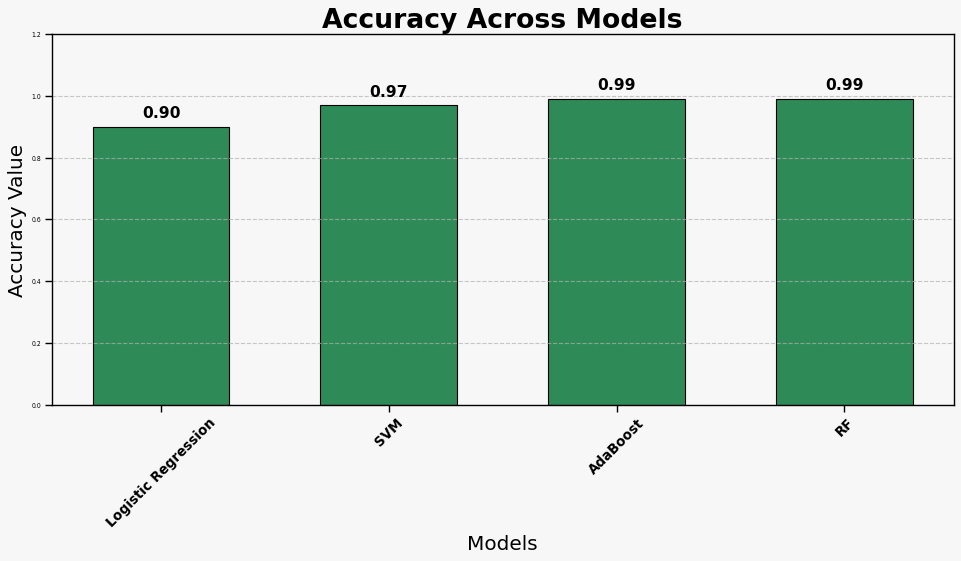

In [85]:
# Sort values based on 'accuracy'
results.sort_values(by='accuracy', ascending=True, inplace=True)
accuracy_scores = results['accuracy']

# Plot the vertical bar chart
fig, ax = plt.subplots(figsize=(12, 7), dpi=80)
bars = ax.bar(results.index, accuracy_scores, color='seagreen', edgecolor='black', width=0.6)

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(accuracy_scores, results.index)):
    ax.text(i, value + 0.02, f"{value:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=14)

# Set y-axis limit
ax.set_ylim([0, 1.2])

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Set title and axis labels with better fonts and styles
plt.title("Accuracy Across Models", fontweight='bold', fontsize=24)
plt.ylabel('Accuracy Value', fontsize=18)
plt.xlabel('Models', fontsize=18)

# Customize the background and gridlines for better visibility
fig.patch.set_facecolor('#f7f7f7')
ax.set_facecolor('#f7f7f7')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


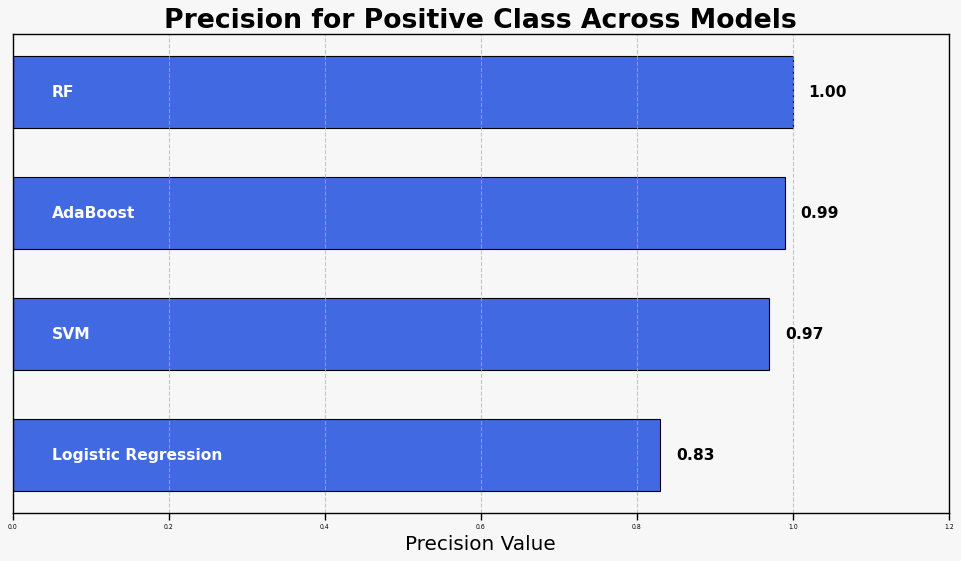

In [86]:
# Sort values based on 'precision_1'
results.sort_values(by='precision_1', ascending=True, inplace=True)
precision_1_scores = results['precision_1']

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7), dpi=80)
bars = ax.barh(results.index, precision_1_scores, color='royalblue', edgecolor='black', height=0.6)

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(precision_1_scores, results.index)):
    ax.text(value + 0.02, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='black', fontsize=14)
    ax.text(0.05, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=14)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0, 1.2])

# Add gridlines for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Set title and axis labels with better fonts and styles
plt.title("Precision for Positive Class Across Models", fontweight='bold', fontsize=24)
plt.xlabel('Precision Value', fontsize=18)

# Customize the background and gridlines for better visibility
fig.patch.set_facecolor('#f7f7f7')
ax.set_facecolor('#f7f7f7')

# Show the plot
plt.tight_layout()
plt.show()


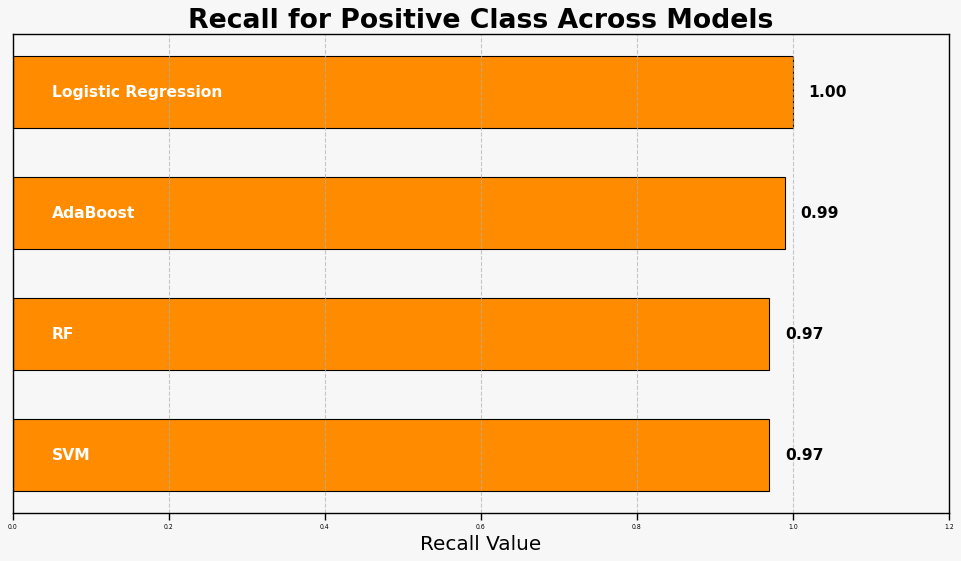

In [87]:
# Sort values based on 'recall_1'
results.sort_values(by='recall_1', ascending=True, inplace=True)
recall_1_scores = results['recall_1']

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7), dpi=80)
bars = ax.barh(results.index, recall_1_scores, color='darkorange', edgecolor='black', height=0.6)

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.02, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='black', fontsize=14)
    ax.text(0.05, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=14)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0, 1.2])

# Add gridlines for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Set title and axis labels with better fonts and styles
plt.title("Recall for Positive Class Across Models", fontweight='bold', fontsize=24)
plt.xlabel('Recall Value', fontsize=18)

# Customize the background and gridlines for better visibility
fig.patch.set_facecolor('#f7f7f7')
ax.set_facecolor('#f7f7f7')

# Show the plot
plt.tight_layout()
plt.show()

### ROC Curve and AUC Score Comparison

In this section, I evaluated the performance of different models (AdaBoost, Logistic Regression, SVM, and Random Forest) using the **Receiver Operating Characteristic (ROC) Curve** and **AUC Score**.

#### Steps:
1. **ROC Curve**: The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for each model. It helps to visualize how well the model distinguishes between the positive and negative classes.
2. **AUC Score**: The Area Under the Curve (AUC) represents the overall ability of the model to discriminate between the classes. A higher AUC score indicates a better model. A model with an AUC score close to 1 is considered to have excellent discriminatory power, while a model with an AUC of 0.5 indicates random guessing.

#### Results:
- **Plot**: The ROC curves for all the models are shown, with each model’s AUC score displayed in the legend.
- **Diagonal Line**: The gray dashed line represents the ROC curve for a random classifier (AUC = 0.5), which serves as a baseline.

#### AUC Score Summary:
- **AdaBoost**: The AUC score indicates its ability to correctly classify fraudulent transactions with high precision.
- **Logistic Regression**, **SVM**, and **Random Forest**: Each model's AUC score is displayed for easy comparison. The model with the highest AUC score is considered the best at distinguishing between fraud and non-fraud cases.

This analysis helps in choosing the best-performing model based on its ability to distinguish between classes across all thresholds.


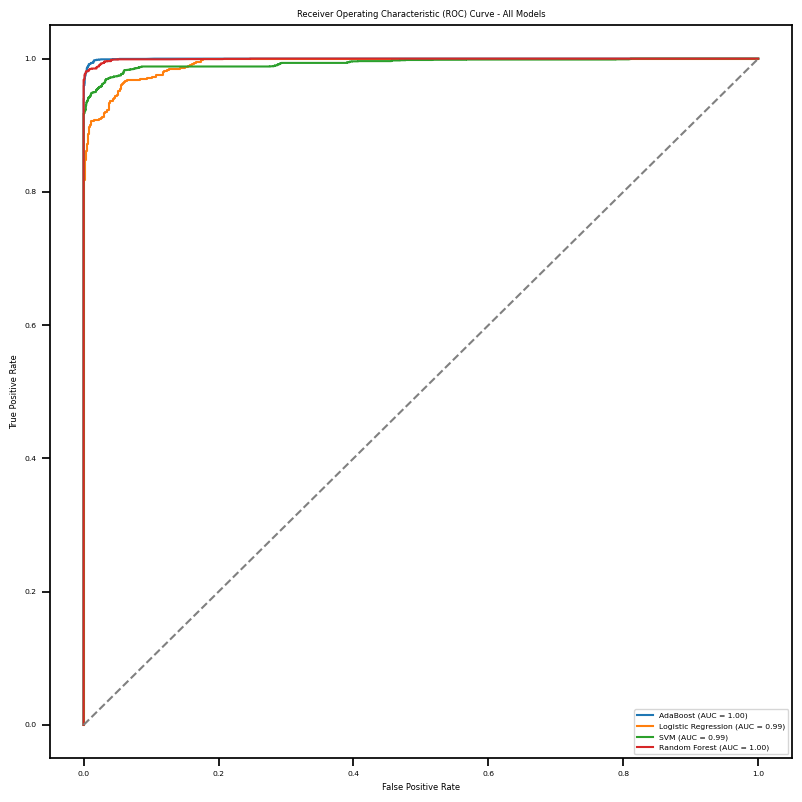

AdaBoost - AUC Score: 1.00
Logistic Regression - AUC Score: 0.99
SVM - AUC Score: 0.99
Random Forest - AUC Score: 1.00


In [89]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# List of your trained and optimized models
models = {
    'AdaBoost': best_ada,
    'Logistic Regression': best_lr,
    'SVM': best_svm,
    'Random Forest': best_rf
}

# Dictionary to store AUC scores for comparison
auc_scores = {}

# Fit and evaluate each model (if not already fitted)
plt.figure(figsize=(8, 8))
for name, model in models.items():
    # Get the predicted probabilities for the positive class (fraudulent transactions)
    y_prob = model.predict_proba(X_test)[:, 1]  # For binary classification

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Calculate the AUC score
    auc_score = roc_auc_score(y_test, y_prob)
    auc_scores[name] = auc_score

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.title('Receiver Operating Characteristic (ROC) Curve - All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()

# Show the plot
plt.show()

# Print AUC scores for comparison
for model_name, auc in auc_scores.items():
    print(f'{model_name} - AUC Score: {auc:.2f}')


Random Forest Feature Importances:
          Feature  Importance
0            step    0.529551
6    type_PAYMENT    0.156325
1          amount    0.086256
2  oldbalanceDest    0.070354
8      is_outlier    0.054961
4   type_CASH_OUT    0.040315
7   type_TRANSFER    0.036430
3  newbalanceDest    0.023379
5      type_DEBIT    0.002430


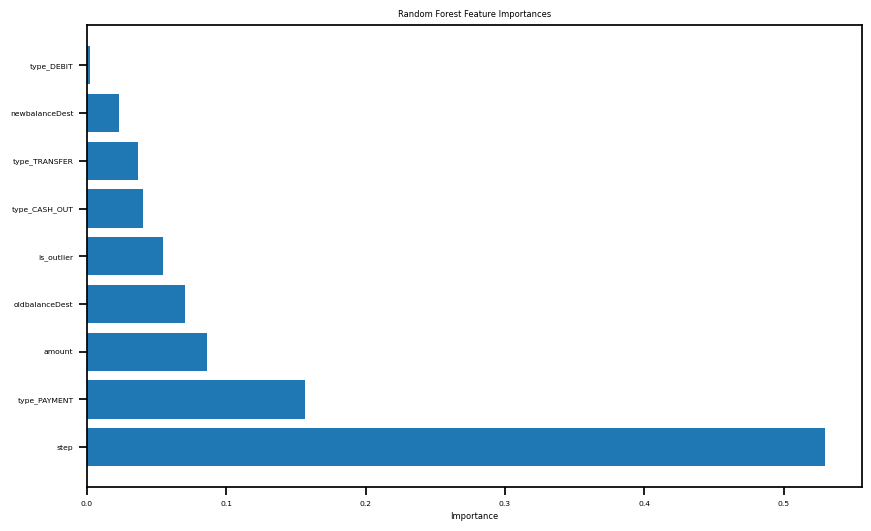

Logistic Regression Feature Importances:
          Feature  Coefficient
0            step     2.982245
7   type_TRANSFER     1.700698
4   type_CASH_OUT     1.530212
8      is_outlier     0.677071
1          amount     0.531026
5      type_DEBIT    -0.333043
2  oldbalanceDest    -0.603087
3  newbalanceDest    -0.617008
6    type_PAYMENT    -1.687241


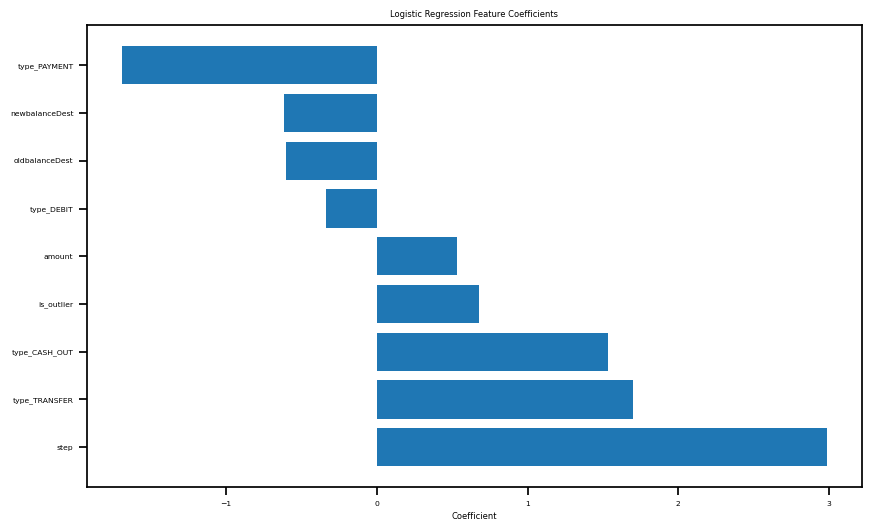

AdaBoost Feature Importances:
          Feature  Importance
0            step    0.353109
6    type_PAYMENT    0.158812
1          amount    0.145996
2  oldbalanceDest    0.139125
4   type_CASH_OUT    0.086700
3  newbalanceDest    0.045870
7   type_TRANSFER    0.039684
8      is_outlier    0.021820
5      type_DEBIT    0.008885


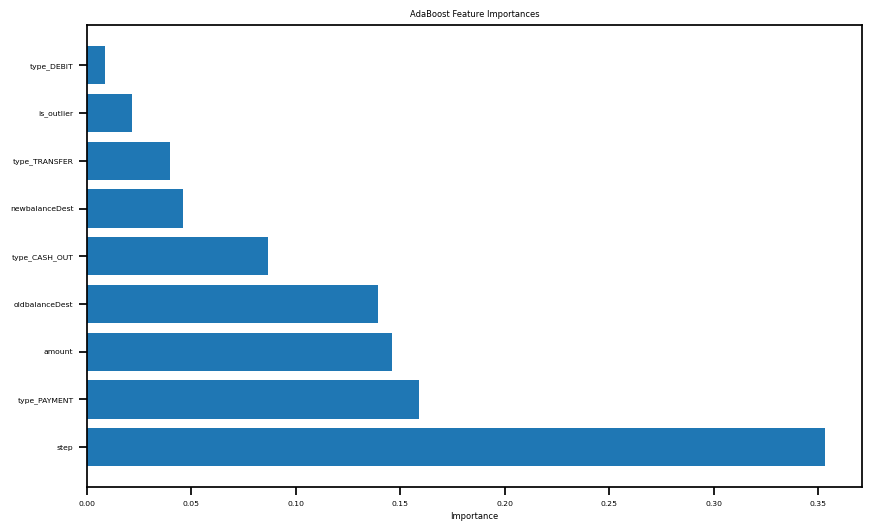

In [92]:
# 1. Random Forest: Feature importances
if hasattr(best_rf, 'feature_importances_'):
    rf_importances = best_rf.feature_importances_
    rf_feature_names = X_train.columns
    rf_feature_importances = pd.DataFrame({'Feature': rf_feature_names, 'Importance': rf_importances})
    rf_feature_importances = rf_feature_importances.sort_values(by='Importance', ascending=False)

    print("Random Forest Feature Importances:")
    print(rf_feature_importances)

    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(rf_feature_importances['Feature'], rf_feature_importances['Importance'])
    plt.title("Random Forest Feature Importances")
    plt.xlabel("Importance")
    plt.show()

# 2. Logistic Regression: Coefficients
if hasattr(best_lr, 'coef_'):
    lr_coefficients = best_lr.coef_[0]
    lr_feature_names = X_train.columns
    lr_feature_importances = pd.DataFrame({'Feature': lr_feature_names, 'Coefficient': lr_coefficients})
    lr_feature_importances = lr_feature_importances.sort_values(by='Coefficient', ascending=False)

    print("Logistic Regression Feature Importances:")
    print(lr_feature_importances)

    # Plotting coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(lr_feature_importances['Feature'], lr_feature_importances['Coefficient'])
    plt.title("Logistic Regression Feature Coefficients")
    plt.xlabel("Coefficient")
    plt.show()

# 3. AdaBoost: Feature importances (using the base estimator)
if hasattr(best_ada, 'feature_importances_'):
    ada_importances = best_ada.feature_importances_
    ada_feature_names = X_train.columns
    ada_feature_importances = pd.DataFrame({'Feature': ada_feature_names, 'Importance': ada_importances})
    ada_feature_importances = ada_feature_importances.sort_values(by='Importance', ascending=False)

    print("AdaBoost Feature Importances:")
    print(ada_feature_importances)

    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(ada_feature_importances['Feature'], ada_feature_importances['Importance'])
    plt.title("AdaBoost Feature Importances")
    plt.xlabel("Importance")
    plt.show()



### Model Evaluation for Overfitting

We are evaluating four different models (AdaBoost, Logistic Regression, SVM, and Random Forest) to check for overfitting by comparing the performance metrics on both training and test datasets. 

Here are the details of the evaluation:

- **Train Accuracy vs Test Accuracy**: A significant gap (greater than 0.1) might indicate overfitting.
- **Train ROC-AUC vs Test ROC-AUC**: A significant gap here also suggests the model may be overfitting.
- **Classification Report**: Provides a detailed breakdown of the precision, recall, and F1-score for both training and tesation Report**:


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Function to evaluate a model on both train and test data
def evaluate_overfitting(model, X_train, y_train, X_test, y_test, model_name):
    # Predict on training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Get probabilities for ROC-AUC calculation
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Calculate metrics for train data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_prob)
    train_report = classification_report(y_train, y_train_pred)

    # Calculate metrics for test data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)
    test_report = classification_report(y_test, y_test_pred)

    # Print the results for train and test
    print(f"--- {model_name} ---")
    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print(f"Train ROC-AUC: {train_roc_auc:.4f}, Test ROC-AUC: {test_roc_auc:.4f}")
    print("Train Classification Report:")
    print(train_report)
    print("Test Classification Report:")
    print(test_report)

    # Check for overfitting (significant gap in performance)
    if abs(train_accuracy - test_accuracy) > 0.1 or abs(train_roc_auc - test_roc_auc) > 0.1:
        print(f"Warning: {model_name} might be overfitting.")
    else:
        print(f"{model_name} seems to be generalizing well.")

# Evaluate each model
evaluate_overfitting(best_ada, X_train, y_train, X_test, y_test, 'AdaBoost')
evaluate_overfitting(best_lr, X_train, y_train, X_test, y_test, 'Logistic Regression')
evaluate_overfitting(best_svm, X_train, y_train, X_test, y_test, 'SVM')
evaluate_overfitting(best_rf, X_train, y_train, X_test, y_test, 'Random Forest')


### Learning Curve Plot for Model Evaluation

This section of the code generates and visualizes the learning curves for multiple models: AdaBoost, Logistic Regression, SVM, and Random Forest. A learning curve helps in evaluating how a model's performance changes as the training dataset increases, which is crucial for detecting issues like overfitting or underfitting.

#### What Happens in the Code:
1. **Learning Curve Function:**
   - The `plot_learning_curve()` function calculates the accuracy of each model on both the training and testing datasets at different sizes of training data. 
   - It uses cross-validation (`cv=5`) to ensure the model's performance is reliably evaluated on multiple subsets of the data.
   - It computes and plots the training and test accuracies.

2. **Plotting the Results:**
   - The plot shows the training accuracy (in blue) and the test accuracy (in red).
   - The x-axis represents the size of the training data, and the y-axis represents the accuracy score.
   - We use `tight_layout()` to ensure the plot looks clean and doesn't get cut off.

3. **Models Evaluated:**
   - The learning curves for AdaBoost, Logistic Regression, SVM, and Random Forest are plotted, helping to visually analyze which model performs best and if it's overfitting or underfitting.

This plot will help you understand how well each model generalizes as it learns from more data, and whether it's struggling with either underfitting or overfitting. You can tweak your models based on these insights to improve their performance.


In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X_train, y_train, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    # Calculate the mean and standard deviation for train and test scores
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 16))
    plt.plot(train_sizes, train_mean, label='Train Accuracy', color='blue')
    plt.plot(train_sizes, test_mean, label='Test Accuracy', color='red')
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot learning curve for each model
plot_learning_curve(best_ada, X_train, y_train, 'AdaBoost')
plot_learning_curve(best_lr, X_train, y_train, 'Logistic Regression')
plot_learning_curve(best_svm, X_train, y_train, 'SVM')
plot_learning_curve(best_rf, X_train, y_train, 'Random Forest')


### Saving the Trained Model


In [ ]:
import joblib

# Save the trained model
joblib.dump(best_ada, 'fraud_detection_model.pkl')


### Fraud Prediction Streamlit App

This is a simple Streamlit application designed to predict whether a financial transaction is fraudulent or not. It uses a pre-trained AdaBoost model to analyze transaction data based on a few key features.

#### Key Features:
The model focuses on these top 5 important features for fraud prediction:
- `step`: The step or time period of the transaction.
- `type_PAYMENT`: Whether the transaction is a payment (binary: 0 for no, 1 for yes).
- `amount`: The amount of money involved in the transaction.
- `oldbalanceDest`: The previous balance of the destination account.
- `newbalanceDest`: The updated balance of the destination account.

#### How to Use:
1. **Sidebar Inputs**: On the left side, you can adjust sliders to input values for the features such as the transaction amount and balance, as well as select if the transaction is a payment.
2. **Prediction**: After providing your inputs, click on the "Predict Fraud" button to see whether the transaction is fraudulent or not. The app will also show the confidence level of the prediction.

#### Example:
For example, if you enter the following values:
- `step`: 500
- `type_PAYMENT`: 1 (indicating a payment)
- `amount`: 1000
- `oldbalanceDest`: 5000
- `newbalanceDest`: 4000

The app  output:
- **Prediction**: Fraudulent


This app makes it easy to quickly assess the risk of fraud in transactions using a machine learning model.


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load the trained ADA model
@st.cache_resource
def load_model():
    return joblib.load('fraud_detection_model.pkl')

model = load_model()

# Define the top 5 important features (excluding type_CASH_OUT)
important_features = ['step', 'type_PAYMENT', 'amount', 'oldbalanceDest', 'newbalanceDest']

# Sidebar for user input
st.sidebar.header("Input Features")

# Create a dictionary for user inputs
input_data = {}
for feature in important_features:
    if feature in ['step', 'amount', 'oldbalanceDest', 'newbalanceDest']:
        input_data[feature] = st.sidebar.slider(
            f"{feature}", 0, 10000, 500  # Adjust ranges based on your dataset
        )
    elif feature == 'type_PAYMENT':
        input_data[feature] = st.sidebar.selectbox(
            f"{feature}",
            [0, 1]  # Binary input: 0 or 1 for type_PAYMENT
        )

# Convert input data into a DataFrame
input_df = pd.DataFrame([input_data])

# Display the input data
st.write("### User Inputs")
st.dataframe(input_df)

# Predict button
if st.button("Predict Fraud"):
    prediction = model.predict(input_df)
    prediction_proba = model.predict_proba(input_df)

    st.write(f"### Prediction: {'Fraudulent' if prediction[0] == 1 else 'Not Fraudulent'}")
    st.write(f"### Confidence: {prediction_proba[0][prediction[0]]:.2f}")
